# [ EXPLORATION ] 2. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

✅Kaggle의 bike sharing 데이터셋을 이용해 기초적인 회귀 모델 활용 데이터분석 프로젝트를 진행한다.

---
### - 📖목차
* ✔️2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
* ✔️2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
* ✔️회고 및 결론
* ✔️Reference(참고자료)

<br>



## ✔️2-12. 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
---



#### (1) 데이터 가져오기

In [190]:
# 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlib 설정
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

In [277]:
#데이터 로드
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

#데이터 준비
diabetes = load_diabetes()
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [278]:
#데이터 정보
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

* feature 10개 , 데이터 442개

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [279]:
#데이터 크기
print(diabetes.data.shape)

(442, 10)


In [280]:
#데이터 프레임으로 출력해서 확인하기
df = pd.DataFrame(diabetes.data)
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) #그냥 하면 숫자로만 나와서 columne을 feature로 잡아줘야 했음
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### (2) 모델에 입력할 데이터 X 준비하기

In [281]:
# X 데이터 체크
df_X = diabetes.data
print(df_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


#### (3) 모델에 예측할 데이터 y 준비하기

In [282]:
# y 데이터 체크
df_y = diabetes.target
print(df_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [283]:
#df_X, df_y에 있는 값들을 numpy array로 변환
df_X = np.array(df_X)
df_y = np.array(df_y)

#### (4) train 데이터와 test 데이터로 분리하기

In [284]:
# X_train, x_test, y_train, y_test 생성
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                   test_size=0.2,
                                                   random_state=10)

#test size를 0.2의 비율로 맞추고(20퍼센트), 랜덤 세트의 경우 10으로

#### (5) 모델 준비하기

In [285]:
#입력 데이터 개수에 맞는 가중치 W와 b를 준비
W = np.random.rand(10)
b = np.random.rand()

print(W, '<---- 여기까지가 W')
print(b, '<---- 여기까지가 b')

[0.48326537 0.13799859 0.39071161 0.69978903 0.3438141  0.88101706
 0.91263389 0.49159363 0.60319099 0.46697519] <---- 여기까지가 W
0.14701894371780055 <---- 여기까지가 b


In [286]:
#모델 함수를 구현
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#### (6) 손실함수 loss 정의하기

In [287]:
#손실 함수를 MSE로 정의하기

def MSE(a, b): #MSE 먼저 정의
    mse = ((a-b)**2).mean() #MSE는 제곱의 평균으로 낸다
    return mse

def loss(X, W, b, y): #손실함수 정의
    predictions = model(X, W, b) #앞서 모델의 값을 대입하고
    L = MSE(predictions, y) #MSE를 적용시켜서 return 값으로 가져온다
    return L

* 모형이 데이터에 안 맞는 정도를 나타내는 함수를 손실 함수
* MSE(Mean Squared Error): 오차 제곱의 평균
* MSE = mean((d)^2
* 예측과 실제의 차이가 오차라고 한다면, 이 오차를 모두 제곱한 다음에 평균을 낸 것

#### (7) 기울기를 구하는 gradient 함수 구현하기

In [288]:
#gradient 함수 구현하기
def gradient(X,W,b,y):
    N = len(W) #여기서의 N은 W로 정의된 가중치의 갯수
    y_pred = model(X, W, b) #앞서 모델함수를 가져와서 y_pred를 준비한다.

    dW = 1/N * 2 * X.T.dot(y_pred-y) #공식에 맞게 gradient 계산
    db = 2 * (y_pred - y).mean() #b의 graident 계산
    return dW, db

In [289]:
#Gradient 계산하기
dW, db = gradient(df_X, W, b, df_y)#x는 아까 정의해둔 df_X로, y는 df_y로 가져온다 

print("dW:", dW)
print("db:", db)

dW: [ -60.55007926  -13.82951596 -189.60619496 -142.61239542  -68.18924726
  -55.95299198  127.76284422 -139.04876902 -182.86392693 -123.51052379]
db: -303.9729304383563


#### (8) 하이퍼 파라미터인 학습률 설정하기

In [290]:
#학습률 설정(0.1 ~ 0.00001 까지 테스트한 상태) 
LEARNING_RATE = 0.01

각 학습율마다 손실함수의 수치
* 0.1 = Loss 2861.4371
* 0.01 = Loss 2860.8496
* 0.001 = Loss 2860.7928
* 0.0001 = Loss 2860.7871
* 0.00001 = Loss 2860.7865

= 개인적으로 0.01 정도가 소숫점대비 효율이 좋다고 판단함

#### (9) 모델 학습하기

In [291]:
#for문을 이용해서 학습진행
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train) #모델이 prediction 예측, 손실함수 값을 계산 + 기울기 계산
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train) #손실 함수 적용해서 loss값 계산
    losses.append(L) #loss 값 기록
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 21119.2100
Iteration 20 : Loss 15687.9085
Iteration 30 : Loss 12014.2092
Iteration 40 : Loss 9518.6678
Iteration 50 : Loss 7813.9380
Iteration 60 : Loss 6640.9645
Iteration 70 : Loss 5826.3854
Iteration 80 : Loss 5254.0907
Iteration 90 : Loss 4846.2322
Iteration 100 : Loss 4550.5422
Iteration 110 : Loss 4331.8637
Iteration 120 : Loss 4166.4924
Iteration 130 : Loss 4038.3972
Iteration 140 : Loss 3936.6927
Iteration 150 : Loss 3853.9504
Iteration 160 : Loss 3785.0680
Iteration 170 : Loss 3726.5128
Iteration 180 : Loss 3675.8145
Iteration 190 : Loss 3631.2251
Iteration 200 : Loss 3591.4900
Iteration 210 : Loss 3555.6940
Iteration 220 : Loss 3523.1576
Iteration 230 : Loss 3493.3661
Iteration 240 : Loss 3465.9220
Iteration 250 : Loss 3440.5117
Iteration 260 : Loss 3416.8835
Iteration 270 : Loss 3394.8312
Iteration 280 : Loss 3374.1835
Iteration 290 : Loss 3354.7959
Iteration 300 : Loss 3336.5452
Iteration 310 : Loss 3319.3249
Iteration 320 : Loss 3303.0427
Iteration 330 

#### (10) test 데이터에 대한 성능 확인하기

In [292]:
#모델 성능 테스트
prediction = model(X_test, W, b)
mse1 = loss(X_test, W, b, y_test)
mse1

2959.313958491218

* 학습율 대비 모델 성능 확인

1. 0.1 = 2925.472181017808
2. 0.01 = 2924.968649144025
3. 0.001 = 2924.9194670363263
4. 0.0001 = 2924.9145603207758
5. 0.00001 = 2924.91406976396

= 몇번 돌려본결과 전체적으로 0.001 일때의 효율이 괜찮은 것을 확인

In [137]:
#W와 b의 값을 각각 확인
W, b

(array([   7.50112172, -205.27228088,  507.65767739,  314.49347991,
         -48.00016665, -111.17497993, -214.22749389,  139.99176923,
         413.17452527,   74.49633546]), 152.09059809529984)

#### (11) 정답 데이터와 예측한 데이터 시각화하기


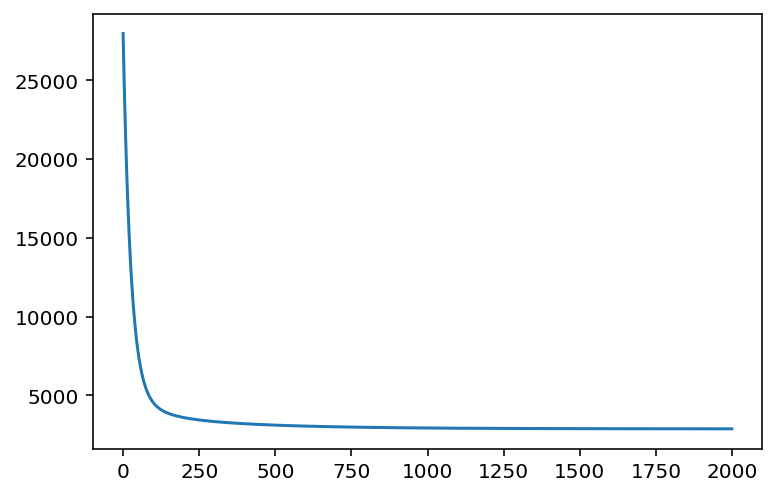

In [138]:
#loss 값이 떨어지고 있는지를 체크
plt.plot(losses)
plt.show()

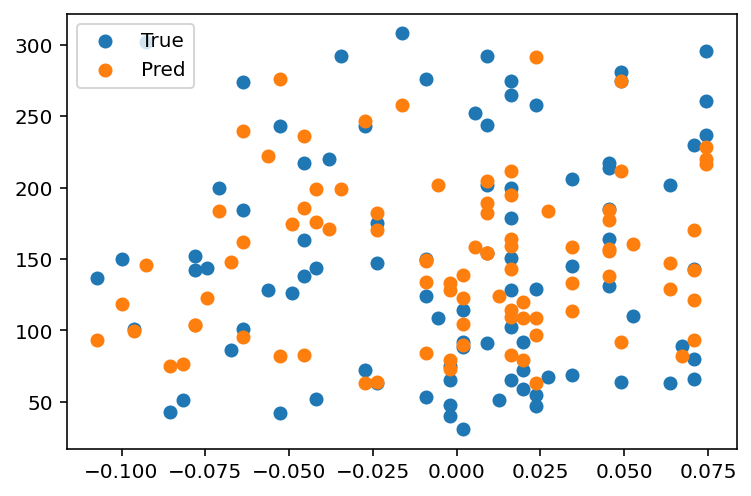

In [143]:
#모델이 얼마나 정확하게 맞혔는지를 시각화
plt.scatter(X_test[:, 0], y_test, label='True')
plt.scatter(X_test[:, 0], prediction, label='Pred')
plt.legend()
plt.show()

* 산점도로 확인한 결과의 경우 전체적으로 데이터가 방사형애 있어서 사실 이렇게만 보면 모델이 얼만큼의 정확도가 있었는지를 파악하는 게 쉽진 않았다. 하지만 몰려있는 구간에 일렬로 쭉 같이 몰려있는 걸 보면 전체적으로 근사치에 가려고 노력했다는 게 느껴졌다.

<br>

## ✔️2-13. 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?
---



#### (1) 데이터 가져오기

In [7]:
# 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#모델 로드
from sklearn.linear_model import LinearRegression

#matplotlib 설정
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

In [ ]:
#코랩에서 작업했기 때문에 터미널이 아닌 file.upload로 대체합니다.
from google.colab import files
files.upload()

In [8]:
#데이터 확인 : train
train = pd.read_csv('train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [9]:
#데이터 확인 : test
test = pd.read_csv('test.csv')
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [10]:
#데이터 크기
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [11]:
#데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB



* train data : 매월 1일 ~19일의 자전거 대여량, 날짜, 기상정보
* test data : 매월 20일 ~ 말일까지의 정보

https://www.kaggle.com/c/bike-sharing-demand/data


#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [12]:
#to_datetime 활용
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [29]:
#pandas datetime extract year month day 키워드로 검색해보기

#Column으로 만들기
train['year'] = train['datetime'].dt.year 
train['month'] = train['datetime'].dt.month 
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour 
train['minute'] = train['datetime'].dt.minute 
train['second'] = train['datetime'].dt.second

* 참고한 레퍼런스 :

https://www.delftstack.com/ko/howto/python-pandas/how-to-extract-month-and-year-separately-from-datetime-column-in-pandas/

#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

Text(0.5, 1.0, '- Bike Sharing Demand: Year -')

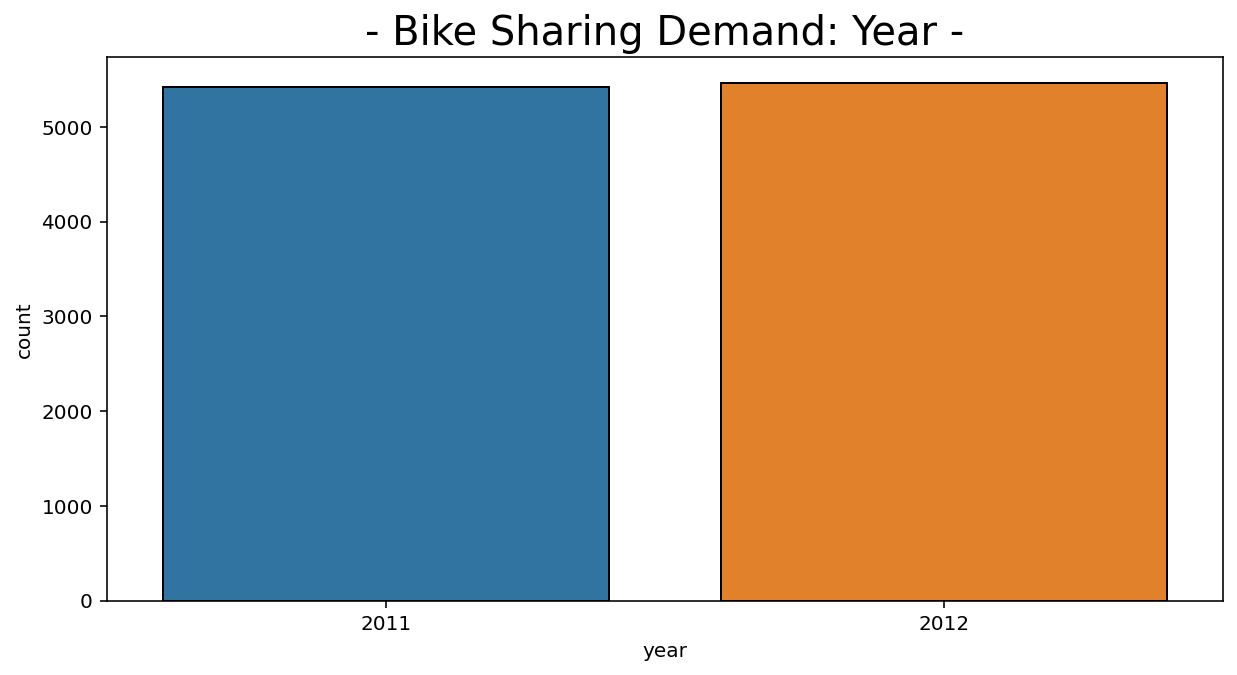

In [130]:
#sns.countplot활용해서 시각화하기

#버전 경고문 무시하기
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#연도 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['year'], edgecolor='black')
plt.title('- Bike Sharing Demand: Year -', fontsize=20)

Text(0.5, 1.0, '- Bike Sharing Demand: Month -')

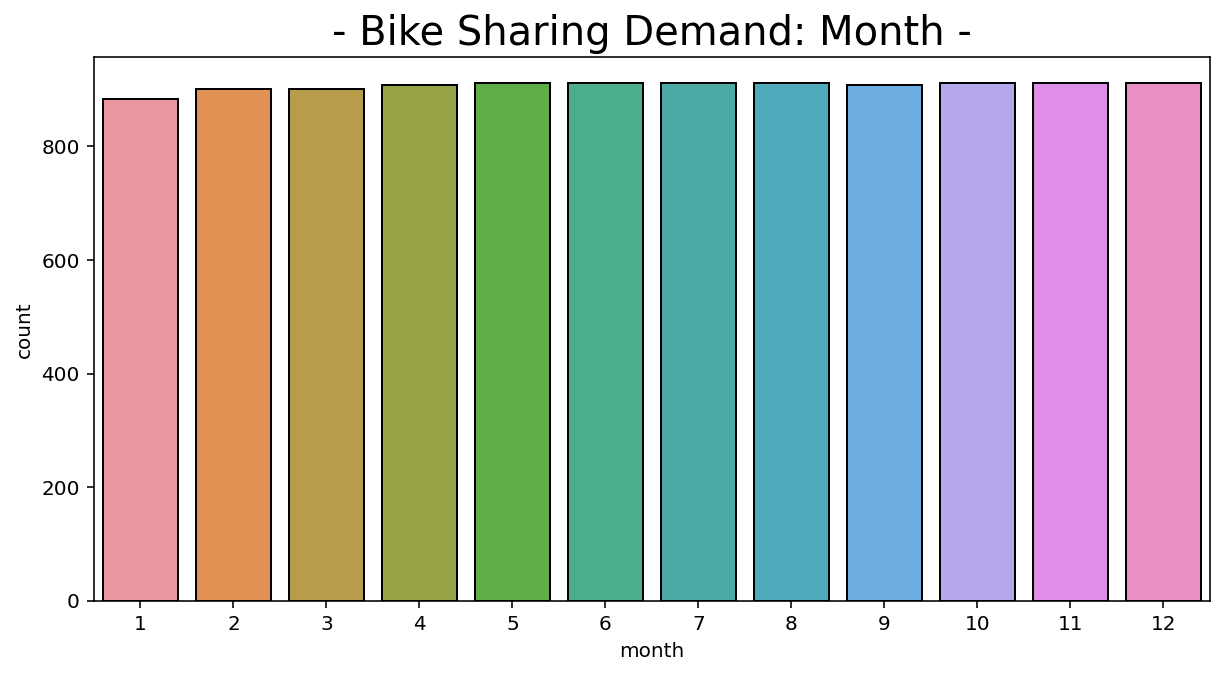

In [129]:
#월별 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['month'], edgecolor='black')
plt.title('- Bike Sharing Demand: Month -', fontsize=20)

Text(0.5, 1.0, '- Bike Sharing Demand: Day -')

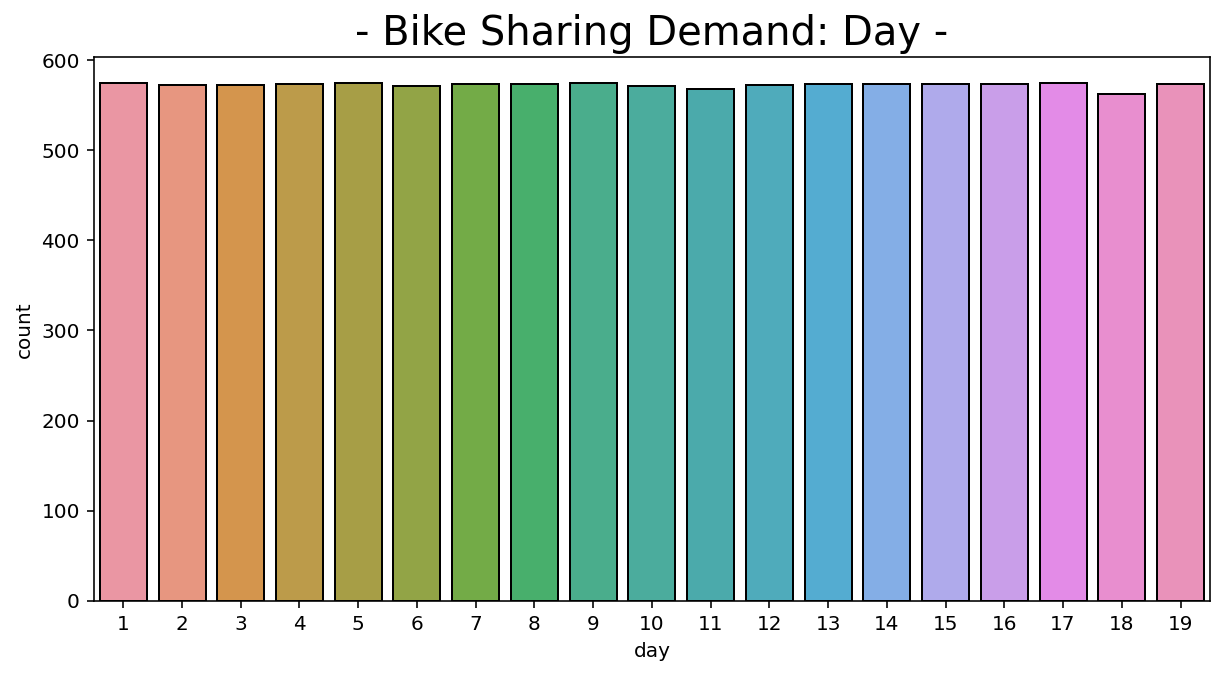

In [128]:
#일별 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['day'], edgecolor='black')
plt.title('- Bike Sharing Demand: Day -', fontsize=20)

Text(0.5, 1.0, '- Bike Sharing Demand: Hour -')

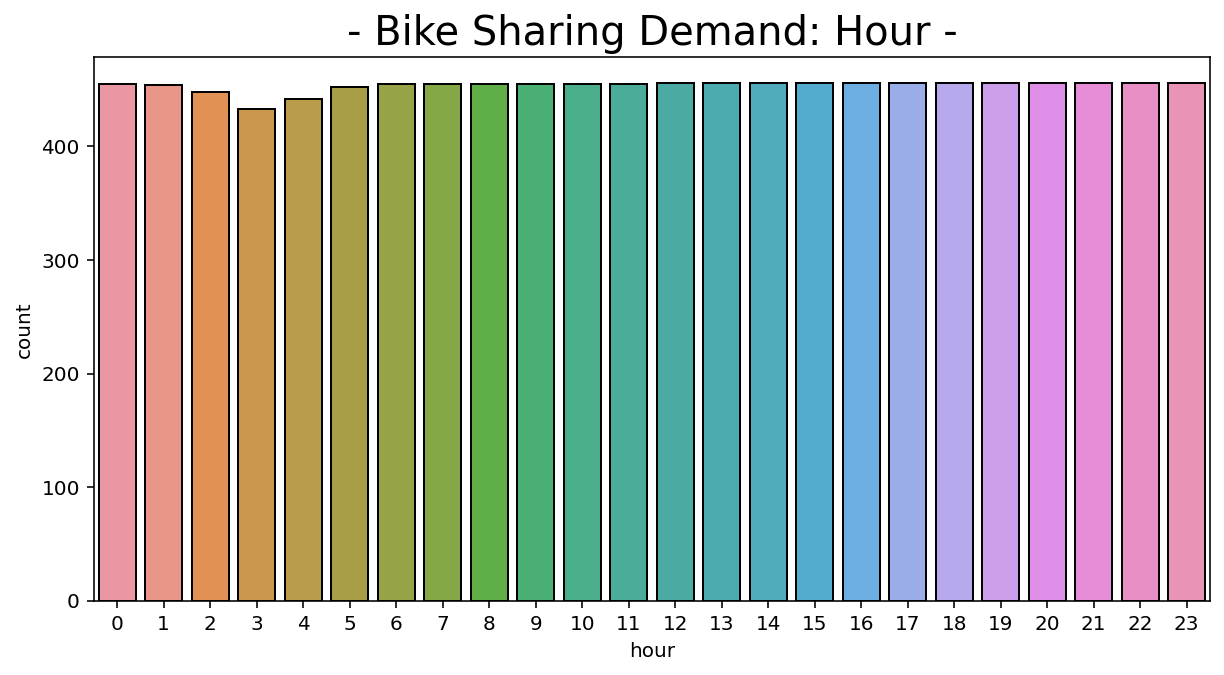

In [127]:
#시간대별 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['hour'], edgecolor='black')
plt.title('- Bike Sharing Demand: Hour -', fontsize=20)

Text(0.5, 1.0, '- Bike Sharing Demand: Minute -')

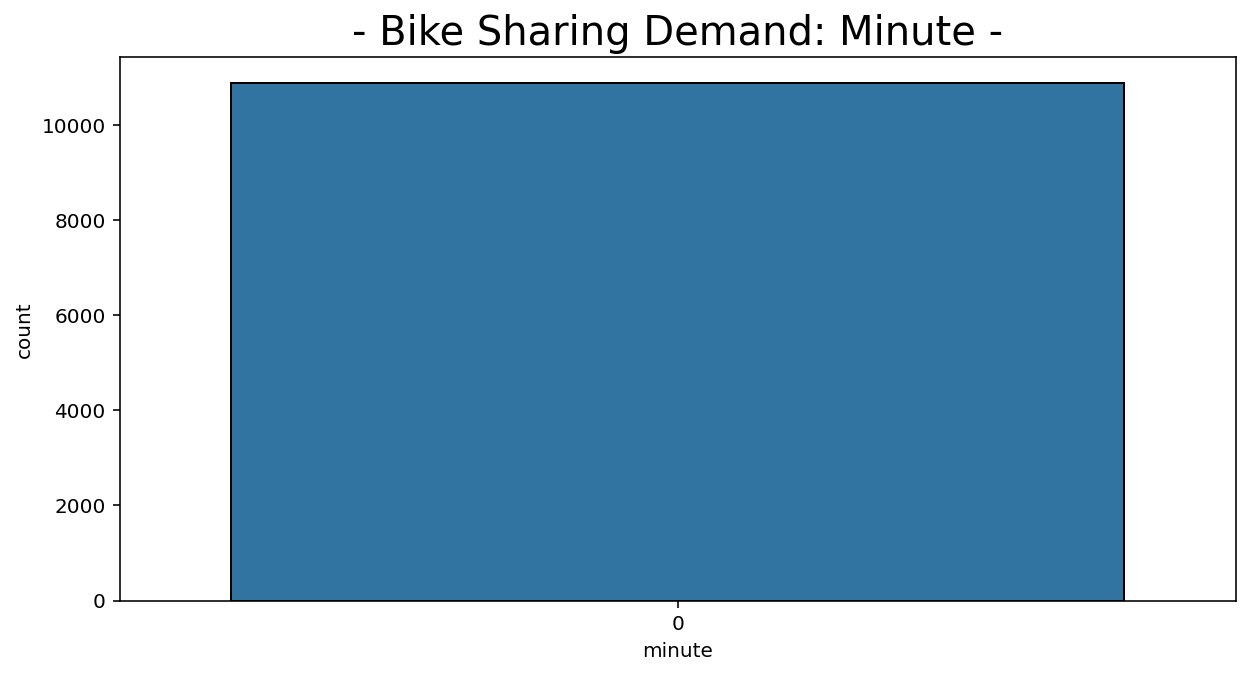

In [126]:
#분단위 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['minute'], edgecolor='black')
plt.title('- Bike Sharing Demand: Minute -', fontsize=20)

Text(0.5, 1.0, '- Bike Sharing Demand: Second -')

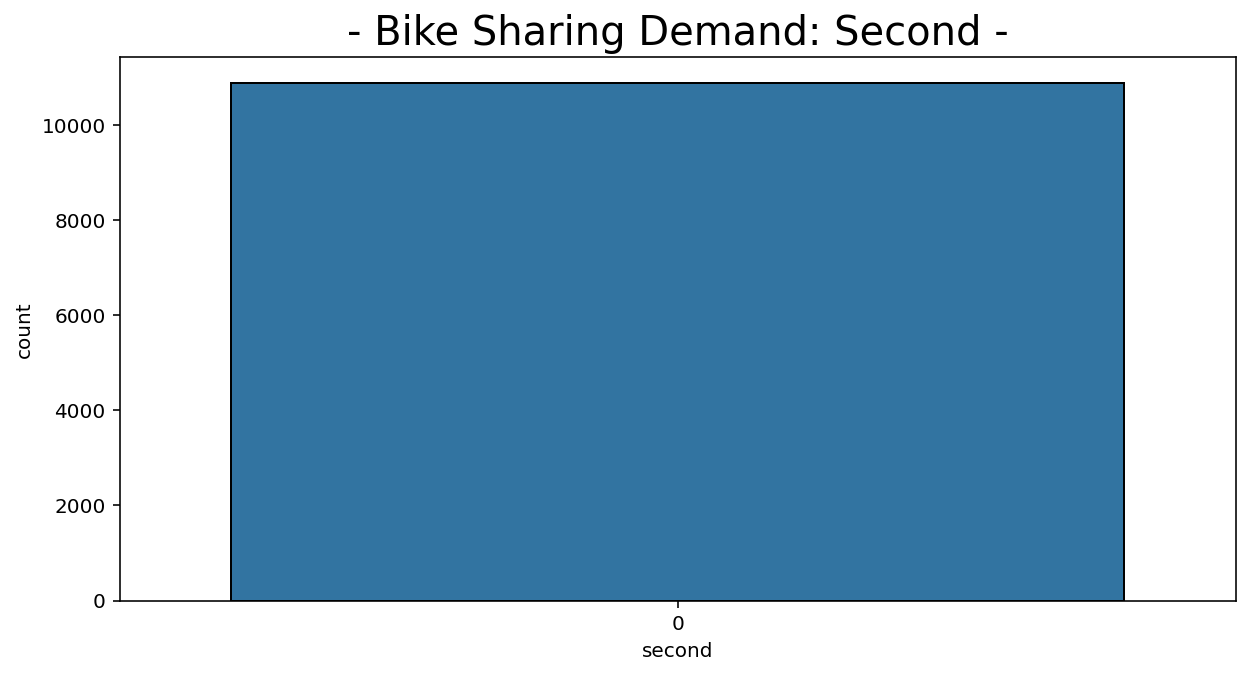

In [125]:
#초단위 시각화
plt.figure(figsize=(10,5))
sns.countplot(train['second'], edgecolor='black')
plt.title('- Bike Sharing Demand: Second -', fontsize=20)

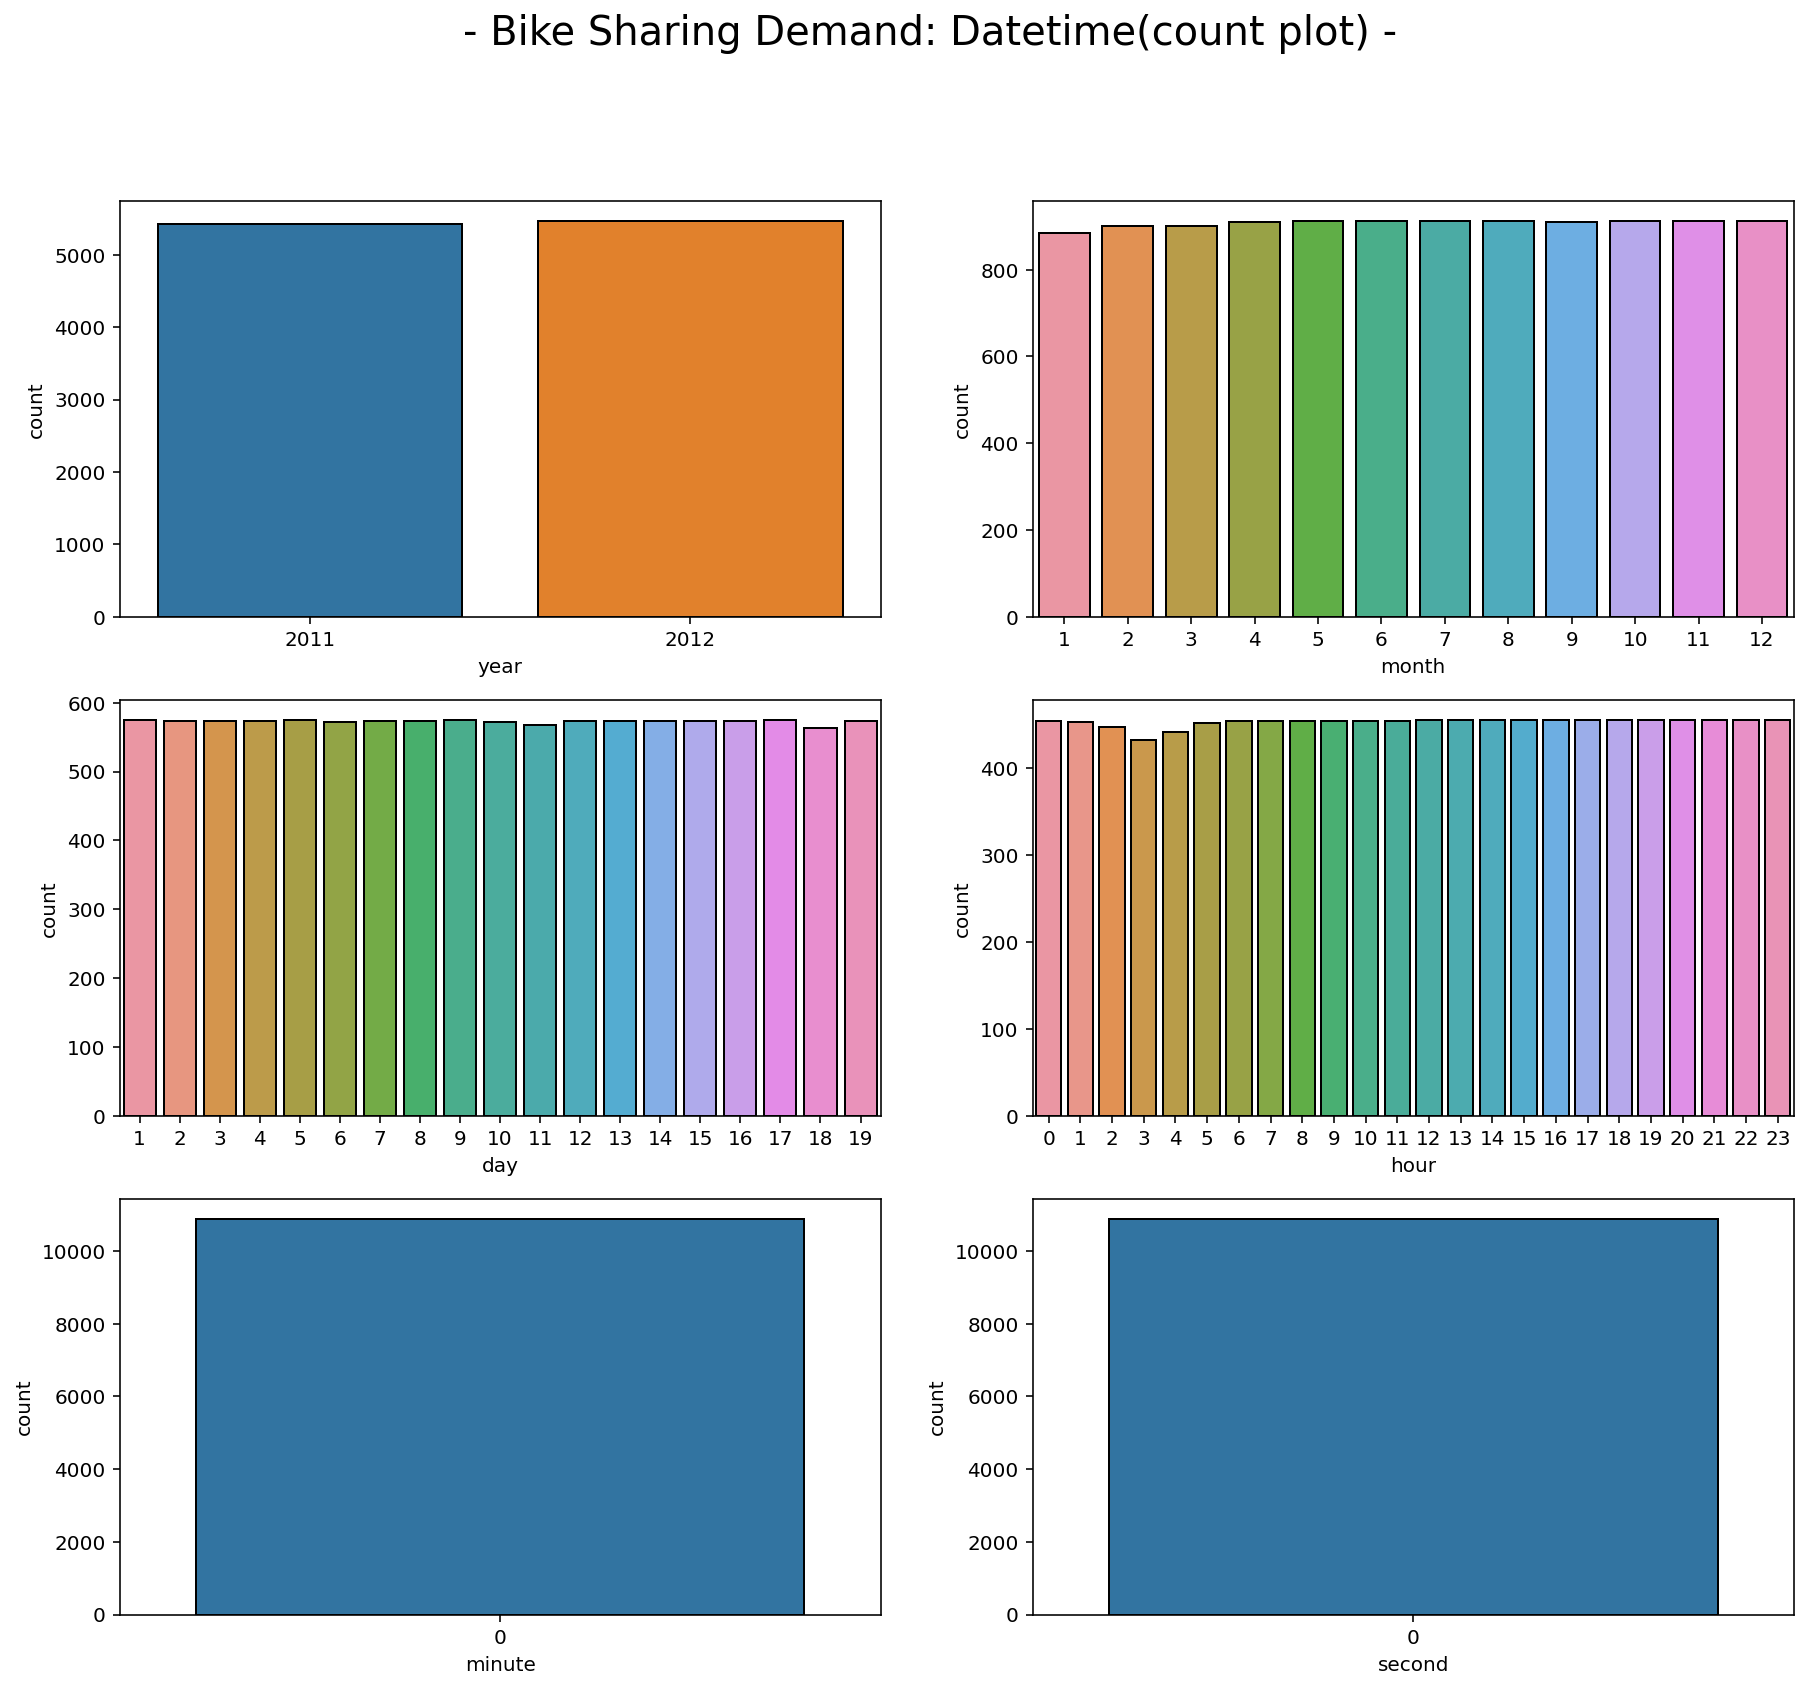

In [124]:
#subplot을 활용해서 한번에 6개의 그래프 시각화하기 - count plot의 경우
figure, ((ax1,ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15,13)

sns.countplot(train['year'], edgecolor='black', ax=ax1)
sns.countplot(train['month'], edgecolor='black', ax=ax2)
sns.countplot(train['day'], edgecolor='black', ax=ax3)
sns.countplot(train['hour'], edgecolor='black', ax=ax4)
sns.countplot(train['minute'], edgecolor='black', ax=ax5)
sns.countplot(train['second'], edgecolor='black', ax=ax6)

plt.suptitle('- Bike Sharing Demand: Datetime(count plot) -', fontsize = 20)
plt.show()

* count로 볼 경우에는 데이터들의 소폭 증가와 감소를 볼 수 있었지만, 확 눈에 띌 정도는 아니었기 때문에 bar plot으로 교체했다.

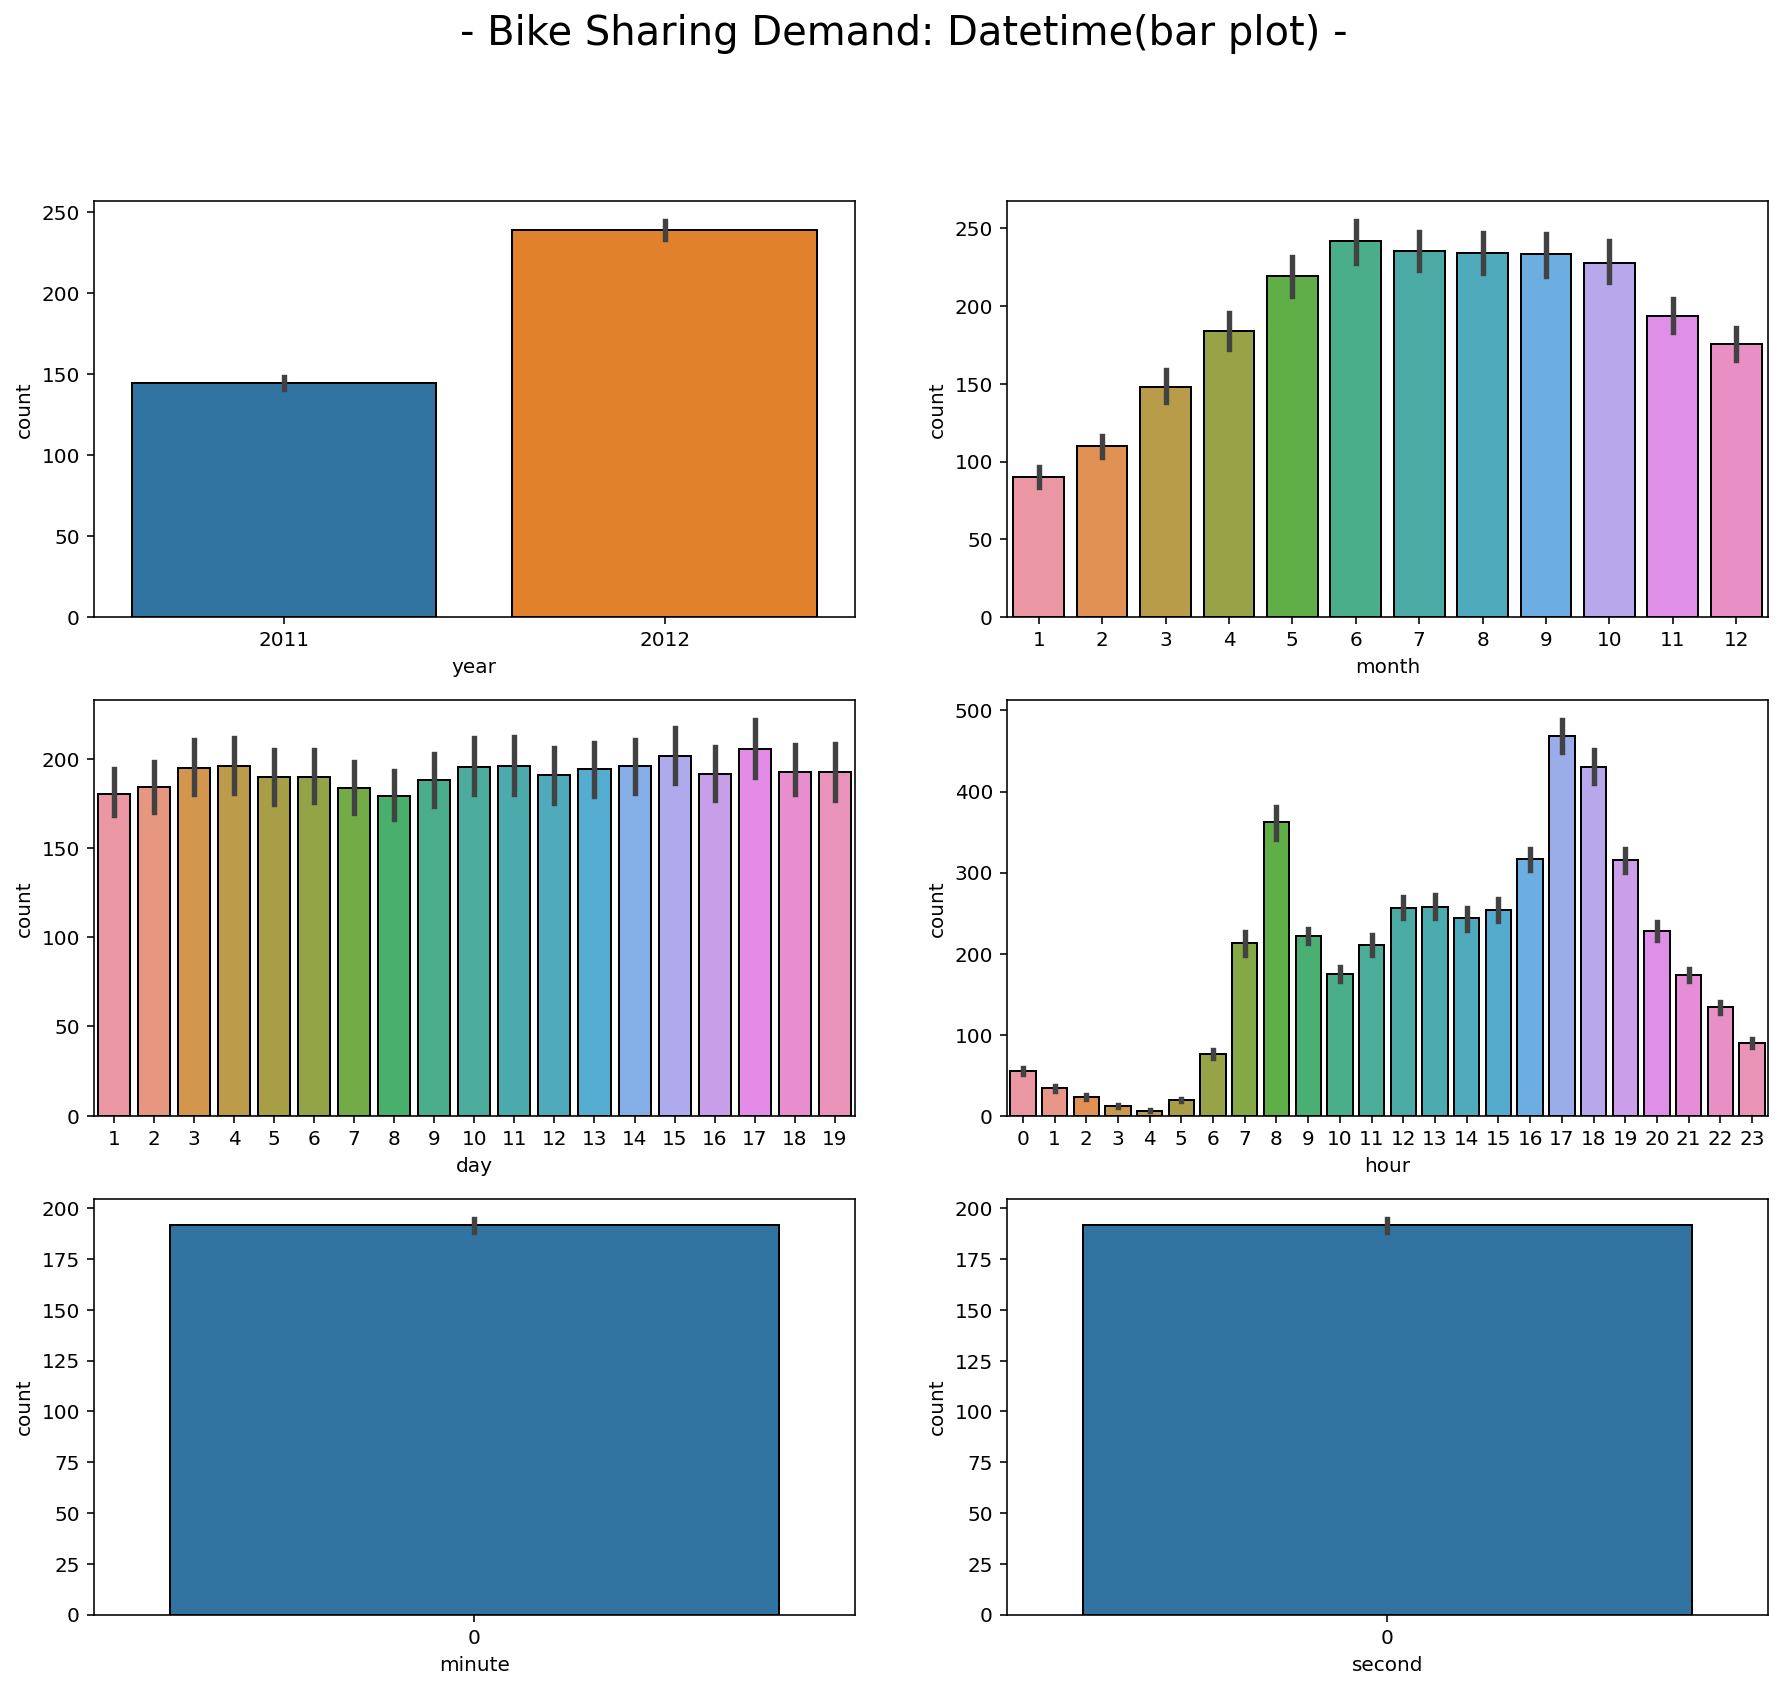

In [123]:
#구글에서 찾은 레퍼런스 : bar plot
figure, ((ax1,ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15,13)

sns.barplot(data=train, x="year", y="count", edgecolor='black', ax=ax1)
sns.barplot(data=train, x="month", y="count", edgecolor='black', ax=ax2)
sns.barplot(data=train, x="day", y="count", edgecolor='black', ax=ax3)
sns.barplot(data=train, x="hour", y="count", edgecolor='black', ax=ax4)
sns.barplot(data=train, x="minute", y="count", edgecolor='black', ax=ax5)
sns.barplot(data=train, x="second", y="count", edgecolor='black', ax=ax6)

plt.suptitle('- Bike Sharing Demand: Datetime(bar plot) -', fontsize = 20)
plt.show()

1. 년도별의 경우 2011년보다 2012년에 대여량이 많다.
2. 월별의 경우 1월이 제일 적고 점점 증가세를 보이다가 6월에 피크를 찍고, 다시 10월부터 감소세를 보임을 확인할 수 있었다.
3. 날짜별의 경우 6일에서 최저점을 찍고 점점 증가하다가 일정 선을 유지하는 것을 확인할 수 있었다.
4. 시간대별의 경우 새벽 시간대인 0시 ~ 6시 까지는 적고, 그 뒤에 8시에 일시적으로 증가했다가 다시 줄어들고, 17시에 다시 피크를 찍고 줄어드는 것을 확인할 수 있었다.

- 분과 초의 경우에는 인사이트를 찾기 쉽지 않아서 패스했다. 이 차트에서 가장 눈에 띄는 결과를 보여준 건 시간대였는데, 아무래도 제일 증가하는 지점이 출근 시간대 8시와 퇴근 시간대 5시 안팎이지 않을까 추측할 수 있었던 계기였다.

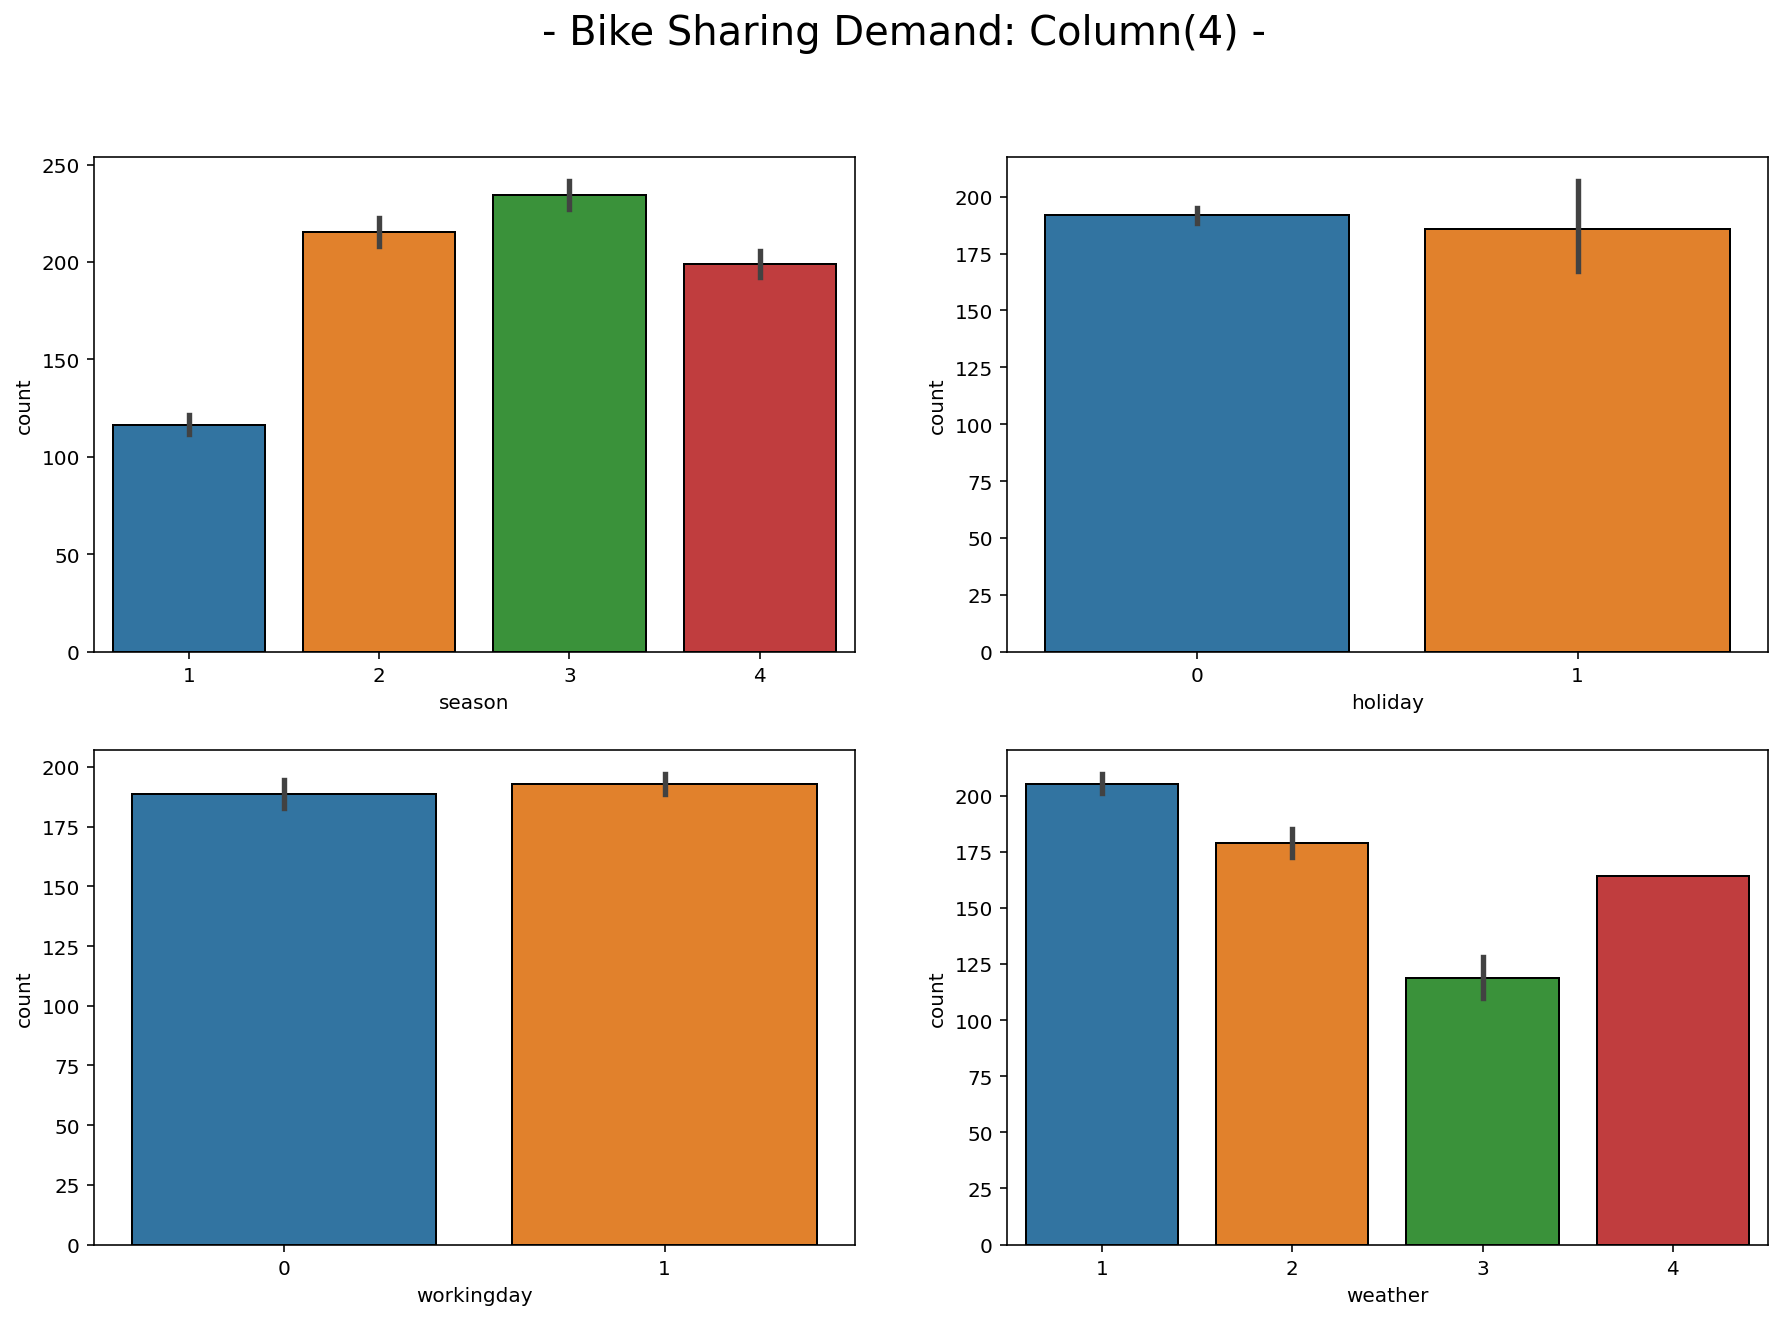

In [139]:
#다른 columns 별로 나온 시각화들
figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)

sns.barplot(data=train, x="season", y="count", edgecolor='black', ax=ax1)
sns.barplot(data=train, x="holiday", y="count", edgecolor='black', ax=ax2)
sns.barplot(data=train, x="workingday", y="count", edgecolor='black', ax=ax3)
sns.barplot(data=train, x="weather", y="count", edgecolor='black', ax=ax4)

plt.suptitle('- Bike Sharing Demand: Column(4) -', fontsize = 20)
plt.show()

1. 시즌별의 경우 추운 1시즌의 경우에는 이용도가 월등히 낮은 것을 확인할 수 있었다.
2. 주말의 경우에는 좀 더 수치가 높다...고 봐야하는지 조금 미묘하다.
3. 평일에는 출퇴근을 이용하는 분들이 있어서 조금 좊게 나온게 아닐까 추측할 수 있었다.
4. 날씨에 대한 변수는 이용량에 큰 차이를 보여줬다.

Text(0.5, 1.0, '- Bike Sharing Demand: Columns -')

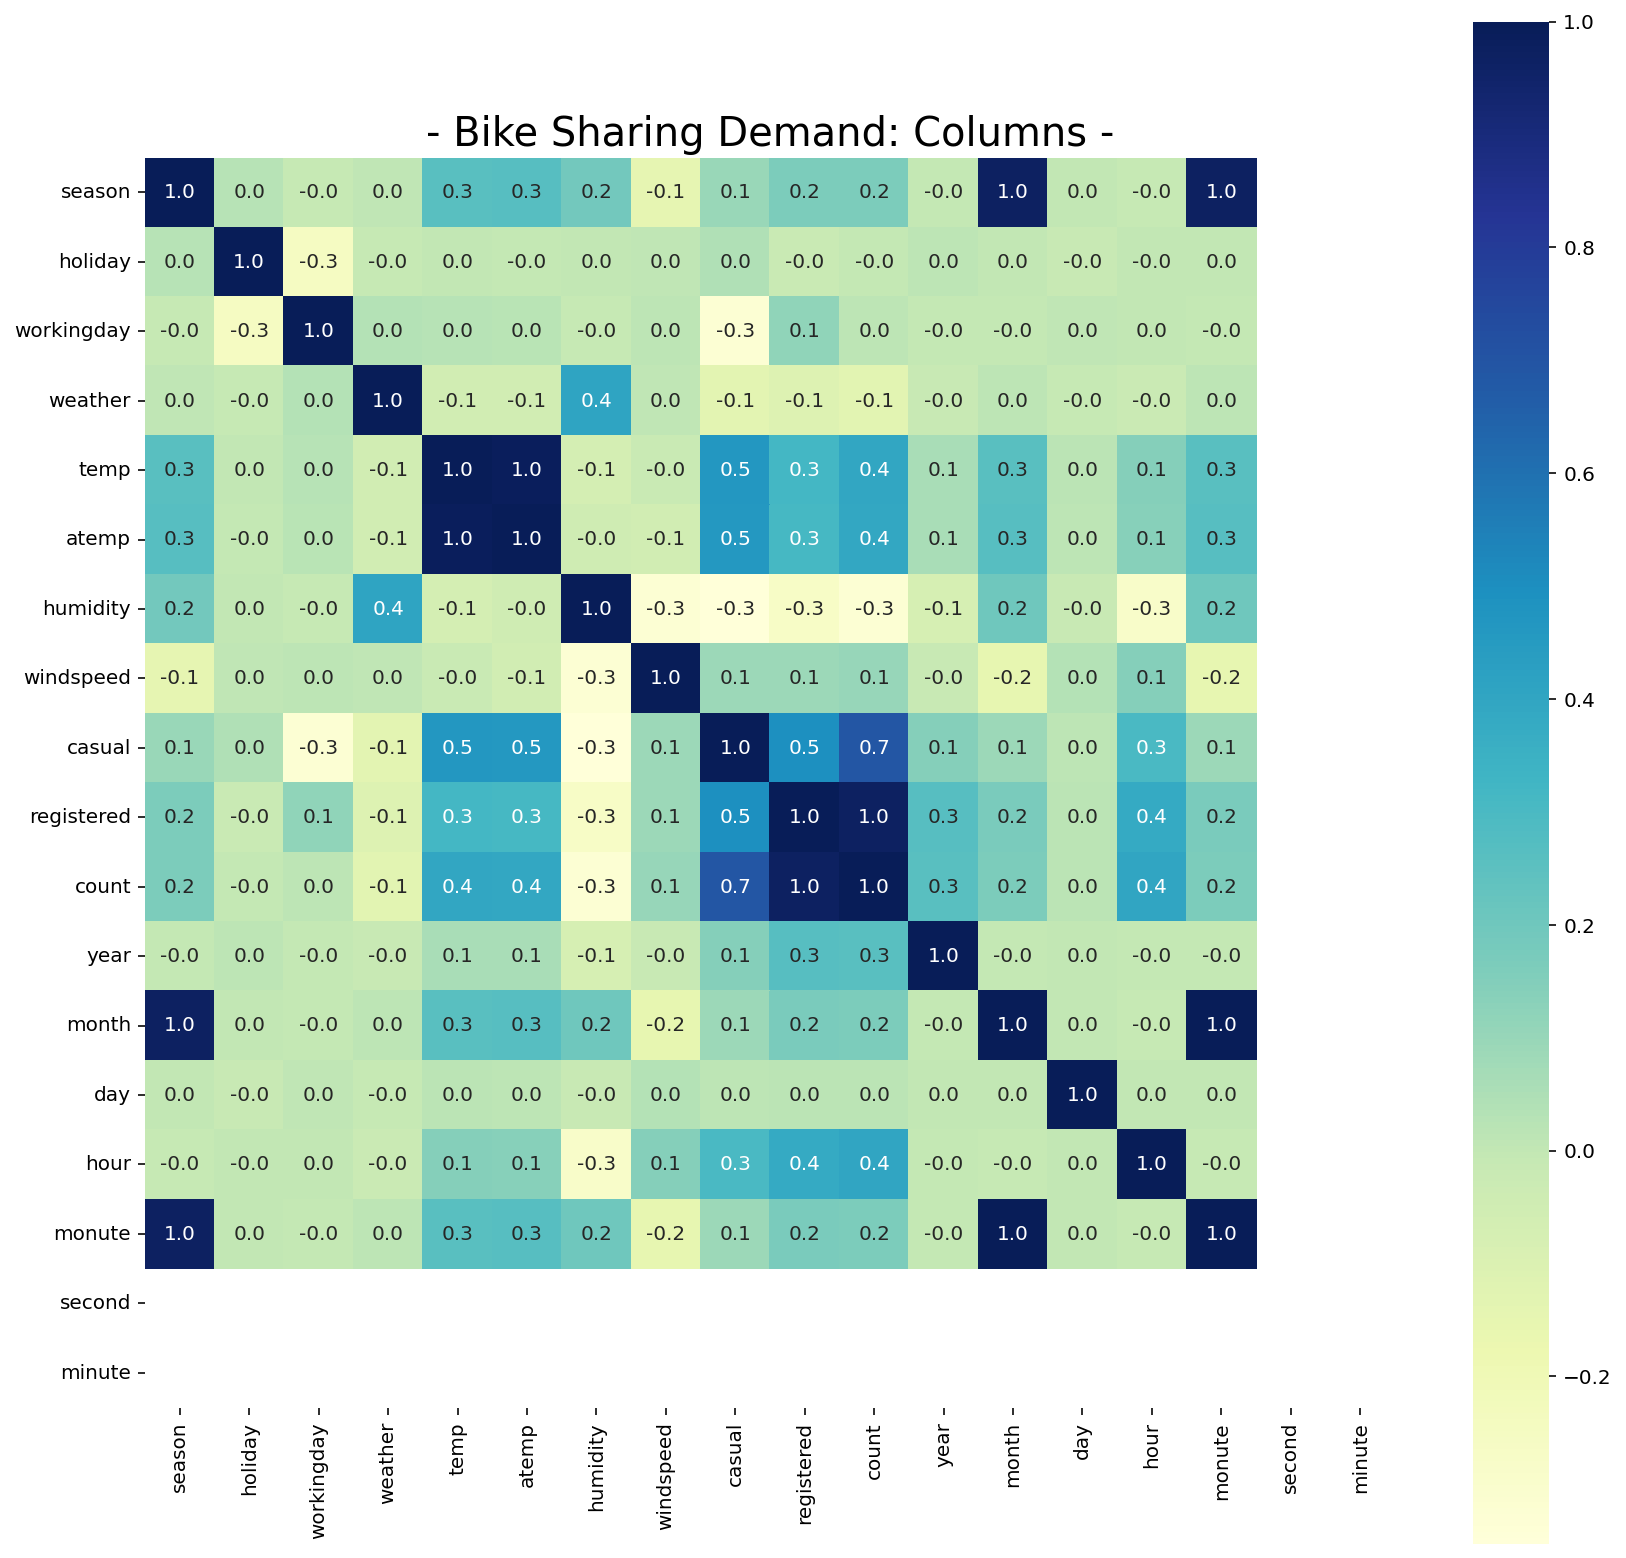

In [132]:
#나머지 column간의 관계를 위해 히트맵으로 구현(역시 구글링..)
corrmat = train.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corrmat, cmap='YlGnBu', annot=True, fmt='.1f', vmax=1, square=True)
plt.title('- Bike Sharing Demand: Columns -', fontsize=20)

* 전체적인 상관관계를 봤을 떄, 가장 눈에 띄는 지점은 'tem[온도] - atemp[체감온도]' 부근과 'count[총 대여량] - registered[회원 대여량]'의 연관이 눈에 띄었고,
차례로 0.7 구간(casual - count), 0.5 구간(temp - casual[비회원 대여량], registered[회원 대여량] - casual) 순이었다. 따라서 위에 bar plot을 이용해 따로 뺀 요소들 외에 '온도-체감 온도' 도 꽤 영향을 끼칠 수 있겠다는 걸 확인할 수 있었다.

#### (4) X, y 컬럼 선택 및 train/test 데이터 분리

In [227]:
# X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기 
feature = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X = train[feature]
print(X.shape)

(10886, 11)


In [248]:
X # X에 들어간 데이터 프레임 값 확인

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,1,1,13.94,17.425,61,6.0032,2012,12,19,22


* 앞서 진행한 시각화에서 'minute' 와 'second'는 눈에 띌만한 결과가 없었기 때문에 feature에서 패스했다.
* 처음에 모델의 정확도가 1자리 수여서 돌려보던중, 주 요인으로 작용한 총 대여량(count), 가입자 대여량(registered), 비가입자 대여량(casual)도 제외시켰다.

In [249]:
# count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
y = train['count']

In [250]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [251]:
# X_train, x_test, y_train, y_test 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2)

#test size를 0.2의 비율로 맞추고, 랜덤 세트의 경우 2로

In [252]:
#분리된 데이터들을 확인
print(X_train.shape)
print(X_test.shape)

(8708, 11)
(2178, 11)


#### (5) LinearRegression 모델 학습

In [253]:
#sklearn의 LinearRegression 모델 불러오기 및 학습하기
from sklearn.linear_model import LinearRegression #사실 이미 불러온 상태

model = LinearRegression()

In [254]:
#모델에 데이터를 학습시키기
model.fit(X_train, y_train)

LinearRegression()

#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [255]:
#학습된 모델에 X_test 를 입력해서 예측값 출력하기
y_pred = model.predict(X_test)
y_pred

array([-33.96697339,  59.23679918, 112.62548605, ..., 195.79183719,
       197.74006566, 294.24680107])

In [256]:
#모델이 예측한 값과 정답 target 간의 손실함수값 계산하기
#mse 값과 함께 rmse 값도 계산하기
from sklearn.metrics import mean_squared_error

#MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

#RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(rmse)

19733.305815863376
140.47528542723583


* 둘 중 어디에 맞출까를 고민했는데, MSE를 포기하고 프로젝트 2의 두번째 기준이었던 'RMSE 값 150 이하'를 잡기로 했다. 사실 한자리 수가 가능하긴 했는데 너무 비현실적이어서 부득이하게 feature 몇가지를 제외시킴으로서 좀 더 유기적인 학습을 유도했다.

#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [261]:
# x축에 X데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
feature = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour'] #위에 있던걸 끌고 옴
X_df = pd.DataFrame(X_test, columns=feature)
X_df['y_pred'] = y_pred
X_df['y_test'] = y_test

In [262]:
X_df #시각화하기전에 데이터프레임 체크

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,y_pred,y_test
509,1,1,2,6.56,9.090,80,8.9981,2011,2,4,9,-33.966973,127
1501,2,1,2,14.76,16.665,71,19.0012,2011,4,8,10,59.236799,73
3754,3,1,3,24.60,27.275,88,8.9981,2011,9,7,9,112.625486,190
1396,2,1,1,16.40,20.455,56,23.9994,2011,4,4,1,44.829705,11
9916,4,1,2,22.14,25.760,49,8.9981,2012,10,17,13,303.039383,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,1,1,1,12.30,13.635,61,19.9995,2012,3,7,1,76.753725,5
6682,1,1,1,28.70,31.820,39,16.9979,2012,3,15,17,356.228964,713
1920,2,1,1,18.86,22.725,72,15.0013,2011,5,6,22,195.791837,151
5840,1,1,1,12.30,13.635,42,31.0009,2012,1,18,13,197.740066,130


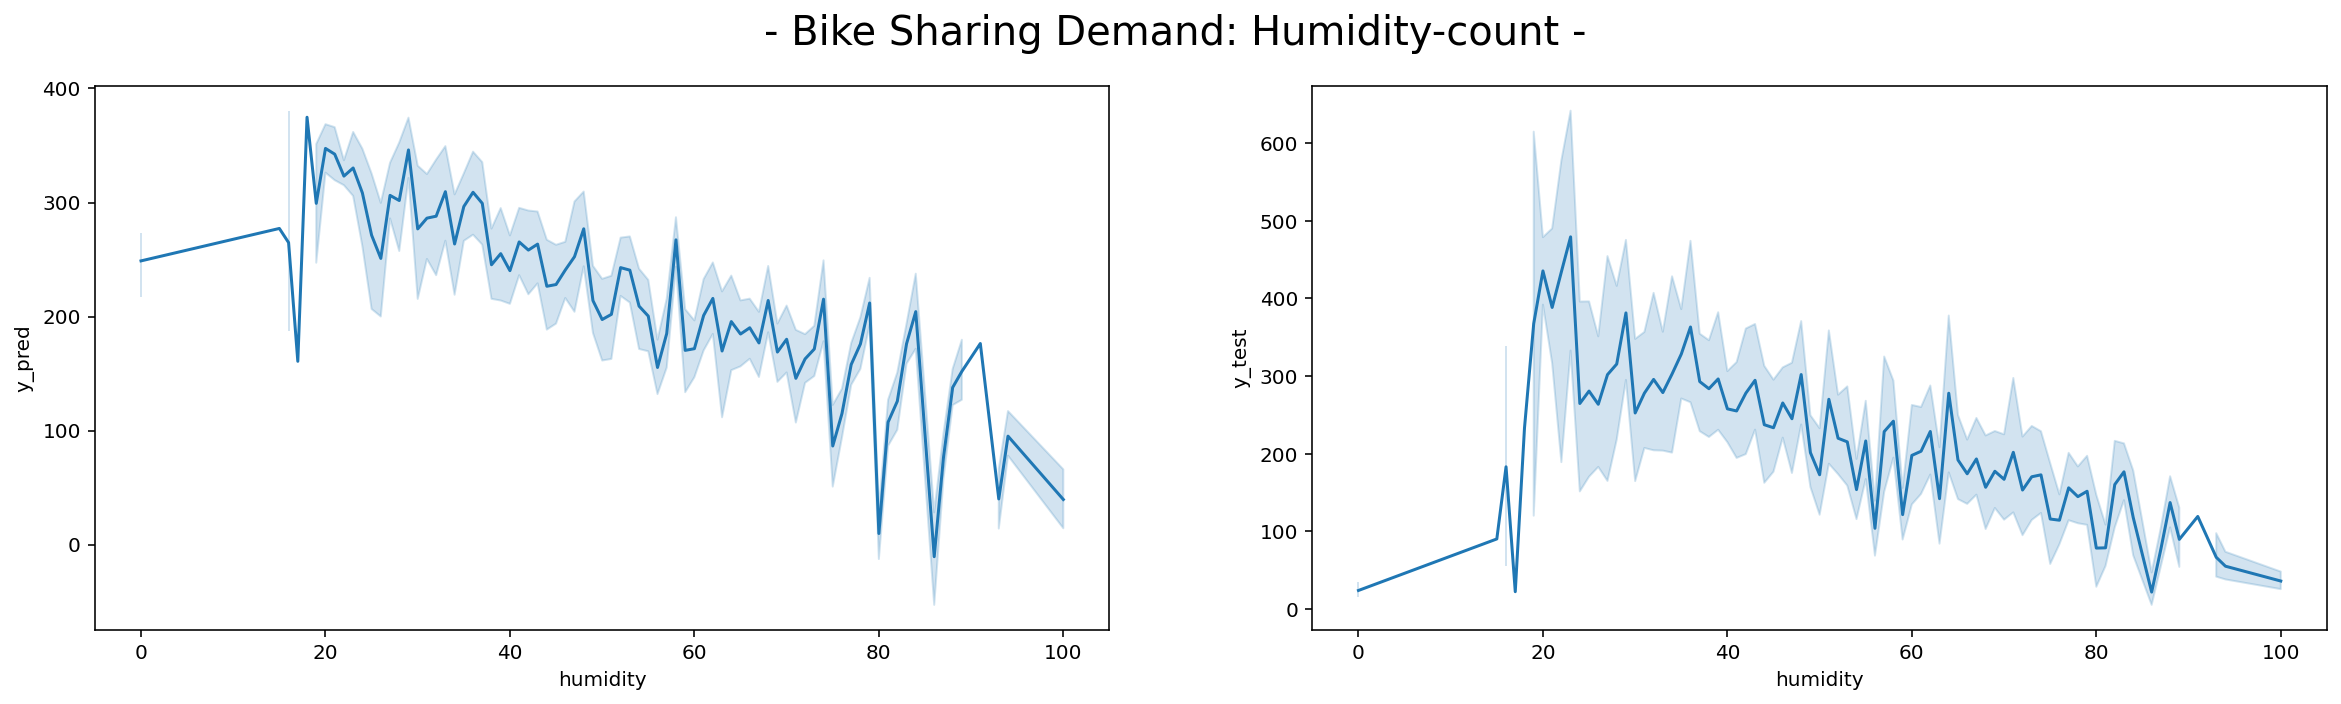

In [275]:
# x축에 X데이터 중 humidity(습도) 데이터를, y 축에는 count(총 대여량) 데이터를 넣어서 시각화하기
figure, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(20,5)

sns.lineplot(x=X_df['humidity'], y=X_df['y_pred'], ax=ax1)
sns.lineplot(x=X_df['humidity'], y=X_df['y_test'], ax=ax2)

plt.suptitle('- Bike Sharing Demand: Humidity-count -', fontsize = 20)
plt.show()

* True값(y_test)과 Prediction값(y_pred)을 라인 그래프로 구현했을 때, 둘 다 비슷한 '음의 상관관계'를 보여줬다. 말인 즉슨, 습도가 점차 높아질수록 이용하는 자전거 대여를 이용하는 사람들이 감소한다는 의미로 받아들였다.

<br>

## ✔️회고 및 결론
---



#### ▶️ 이번 프로젝트에서 어려웠던 점

초기에 멘탈을 깨지게 만들었던건 모델을 처음 만들때 이해가 필요했던 수학적인 지식이었다. 사실상 이번 프로젝트에서 가장 오래걸렸고, 그럼에도 불구하고 일차함수, 손실함수의 이론적인 부분에 이어 정답과 예측값의 간극에 이르기까지의 과정과 기울기와 경사하강법을 어떻게 쓰는지에 대한 개념을 잡을 수 있었다. 사실상 이 부분에 대한 원리와 이해 때문에 실제 직접 손으로 구현하게 만든게 아닐까 프로젝트를 진행하면서 어림잡아 추측했던 기억이 난다.

<br>

#### ▶️ 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

그래도 아직 수학적 지식의 기반이 약해서 정확히 식들이 어떻게 가용되는지에 대한 이해가 확실치 않다. 코드로서의 구현은 따라갈 수 있지만 그걸 제대로 수식으로 풀어내라고 하면 지금도 좀 헷갈린다. 하루 이틀 내에 해결될 문제가 아니므로 추가로 더 공부해야 할 부분임을 실감했다.

<br>

#### ▶️ 루브릭 평가 지표를 맞추기 위해 시도한 것들

이번 프로젝트에서 루브릭의 기준은 아래와 같았다.
1. 프로젝트1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?
2. 프로젝트 2의 회귀모델 예측 정확도가 기준 이상 높게 나왔는가?
3. 시각화 요구사항이 정확하게 이루어졌는가?

In [299]:
print(f"1. '프로젝트1'의  MSE 예측 정확도 수치는 [{mse1: .2f} ]입니다.")
print(f"2. '프로젝트2'의 RMSE 예측 정확도 수치는 [{rmse: .2f} ]입니다.")

1. '프로젝트1'의  MSE 예측 정확도 수치는 [ 2959.31 ]입니다.
2. '프로젝트2'의 RMSE 예측 정확도 수치는 [ 140.48 ]입니다.


1번의 경우 조건은 MSE 손실함수 값 3000 이하를 달성이었는데, 처음에는 3만 가까이 되는 수가 나와서 학습률을 0.1 ~ 0.00001 사이를 조절하며 애를 먹은 기억이 난다. 그 결과 최종 MSE 값을 [ 2959 ]으로 3000이하로 맞출 수 있었다.

2번은 RMSE 값 150 이하 달성이 목표였는데, 처음에 데이터에 모델을 맞춘 후 측정된 정확도는 1, 내지는 2 안팎의 굉장히 정밀하고 작은 수치였다. 하지만 정확한 훈련이 목적이 아닌 모델로 새로운 데이터를 받아들였을때의 융통성있는 정확도 도출이 필요했기 때문에 앞서 제거한 분(minute), 초(second) 외에도 총 대여량(count), 회원 대여량(registered), 비회원 대여량(casual)을 추가로 제거함으로서 최종적으로 RMSE 값 150 이하인 [ 140 ]대를 달성했다.

3번의 요구사항의 경우 데이터 갯수 시각화 및 예측결과 시각화 진행 여부였으며, 마지막에 humidity와 count의 상관관계에 대한 예측과 실제데이터가 흡사하게 구현되는 것 까지 확인했다.

<br>

#### ▶️ 자기 다짐

1번째 프로젝트의 경우 직접 구현해보는 선형회귀를 통해서 원리를 이해할 수 있었고, 2번째 프로젝트는 시각화에 대해서 좀 더 다양한 데이터를 보기 편하게 구현할 수 있는 방법을 궁리해볼 수 있게 만들었다. 좀 더 깔끔하면서도 보기 편한 데이터를 만들고, 정확한 모델을 구현하기 위한 밑거름으로 부족함이 없는 시간이었다.

* 개인적으로 이번 노드의 타이틀이 가진 의미가 궁금했는데, 데이터를 취합해 돌려본 결과, '날씨좋은 / 월요일 / 오후 3시'는 이 데이터에서 사람들이 가장 많이 자전거를 타는 '최적의 조건'이었다.

<br>

## ✔️Reference(참고자료)
---

* https://docs.microsoft.com/ko-kr/azure/open-datasets/dataset-diabetes?tabs=azureml-opendatasets
* https://diane-space.tistory.com/67
* https://www.kaggle.com/code/kongnyooong/bike-sharing-demand-for-korean-beginners/notebook
* https://mintaewon.github.io/2021/01/kaggle-%EC%9E%90%EC%A0%84%EA%B1%B0-%EC%88%98%EC%9A%94-%EC%98%88%EC%B8%A1bike-sharing-demand-1eda/
* https://hong-yp-ml-records.tistory.com/17
* https://hong-yp-ml-records.tistory.com/27
* https://joecho.tistory.com/entry/kaggle-bike-sharing-demand-data-analysis
* https://velog.io/@gggggeun1/subplot-titles-%EC%84%9C%EB%B8%8C%ED%94%8C%EB%A1%AF-%EC%A0%9C%EB%AA%A9-%EC%84%A4%EC%A0%95
* https://rfriend.tistory.com/419
* https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
